In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Correlación en imagenes digitales
## Metodos:

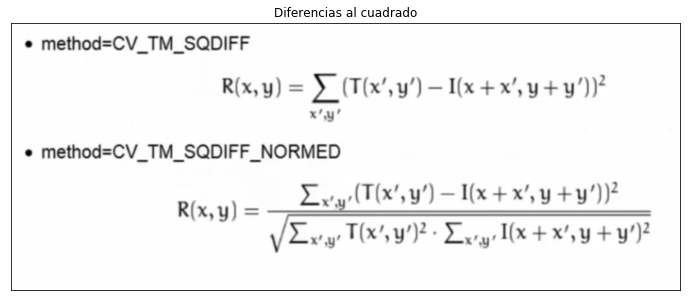

In [34]:
TM_CCOEFF=cv.imread('img/TM_CCOEFF.png',0)
TM_CCORR=cv.imread('img/TM_CCORR.png',0)
TM_SQDIFF=cv.imread('img/TM_SQDIFF.png',0)

plt.figure(figsize=(12,8))
plt.title('Diferencias al cuadrado'), plt.xticks([]), plt.yticks([])
plt.imshow(TM_SQDIFF, cmap = 'gray', interpolation = 'bicubic')
plt.show()


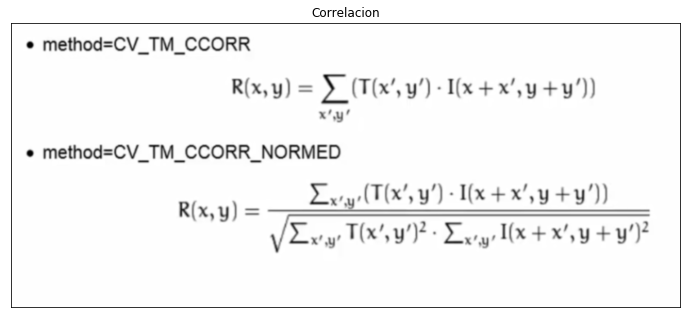

In [35]:
plt.figure(figsize=(12,8))
plt.title('Correlacion'), plt.xticks([]), plt.yticks([])
plt.imshow(TM_CCORR, cmap = 'gray', interpolation = 'bicubic')
plt.show()

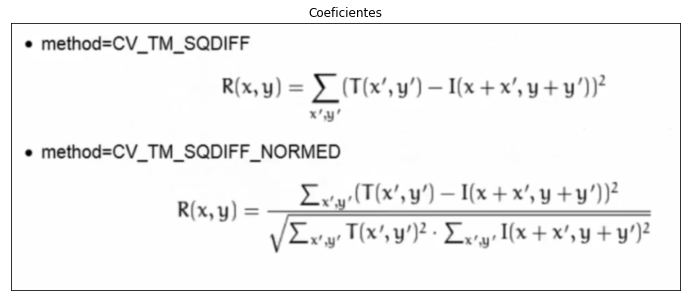

In [36]:
plt.figure(figsize=(12,8))
plt.title('Coeficientes'), plt.xticks([]), plt.yticks([])
plt.imshow(TM_SQDIFF, cmap = 'gray', interpolation = 'bicubic')
plt.show()

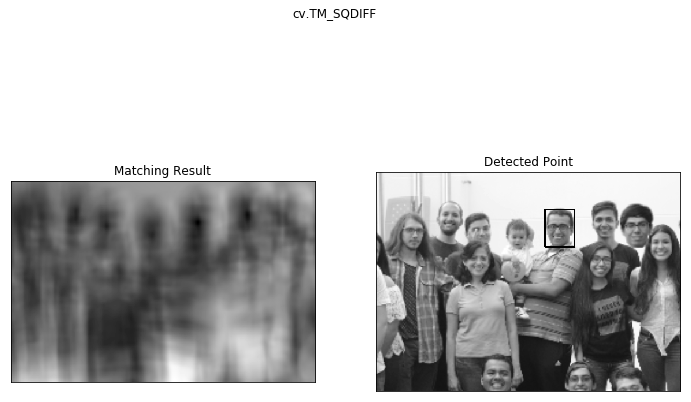

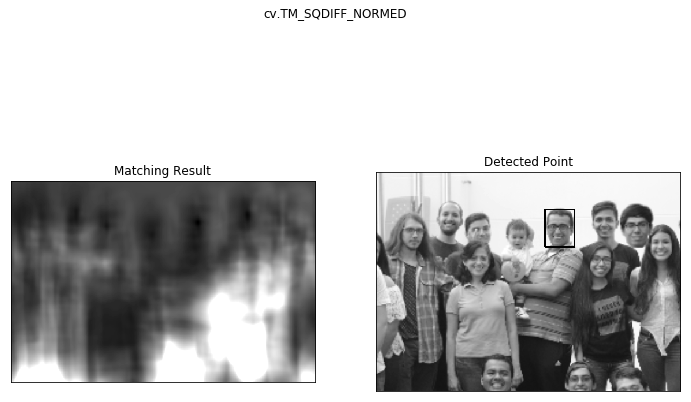

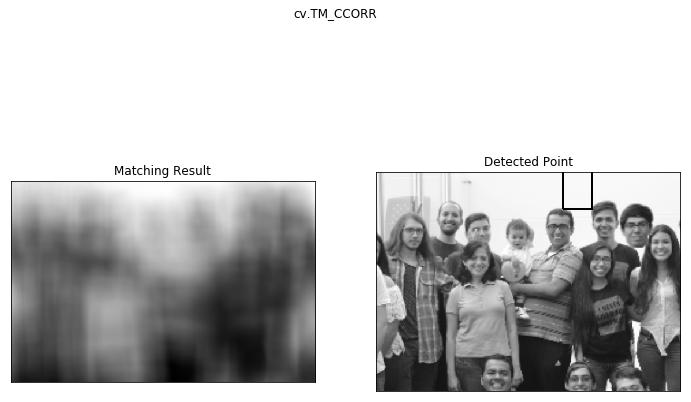

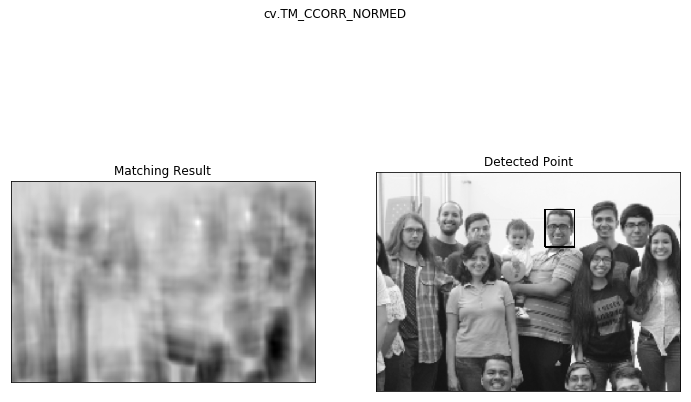

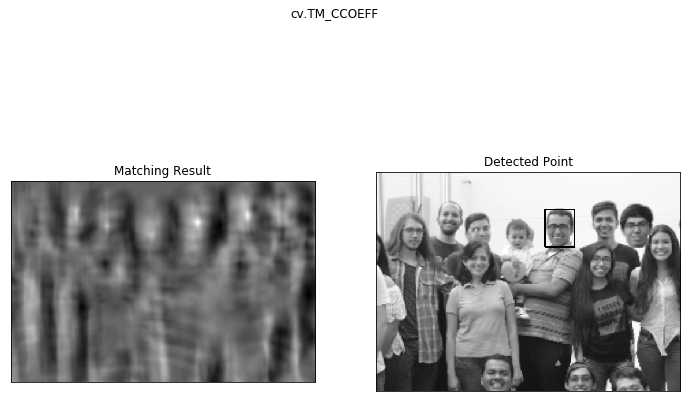

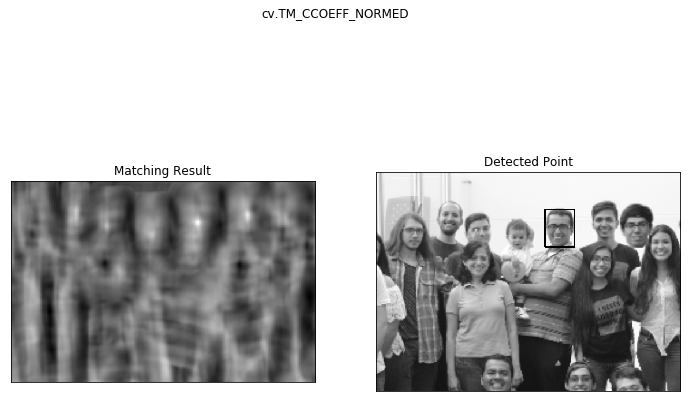

In [27]:
img = cv.imread('img/MACV_People2.png',0)
img2 = img.copy()
template = cv.imread('img/Ftemplate.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED',
           'cv.TM_CCORR',  'cv.TM_CCORR_NORMED',
           'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 0, 2)
    plt.figure(figsize=(12,8))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()